**Import required libraries and load the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

# Load the dataset (change the path as per your directory structure in Colab)
file_path = '/content/drive/MyDrive/heart/heart.csv'
heart_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(heart_data.head())


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


**2. Ensure that there are no discontinuities or errors in the data**

In [4]:
# Check for missing values in the dataset
missing_values = heart_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check data types of each column
data_types = heart_data.dtypes
print("\nData Types:\n", data_types)

# Check the number of unique values in each column
unique_values = heart_data.nunique()
print("\nNumber of Unique Values:\n", unique_values)

# Get a descriptive statistical summary of the dataset
statistical_summary = heart_data.describe()
print("\nStatistical Summary:\n", statistical_summary)


Missing Values:
 age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Data Types:
 age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

Number of Unique Values:
 age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

Statistical Summary:
               age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337

**3. Implement statistical data analysis methods**

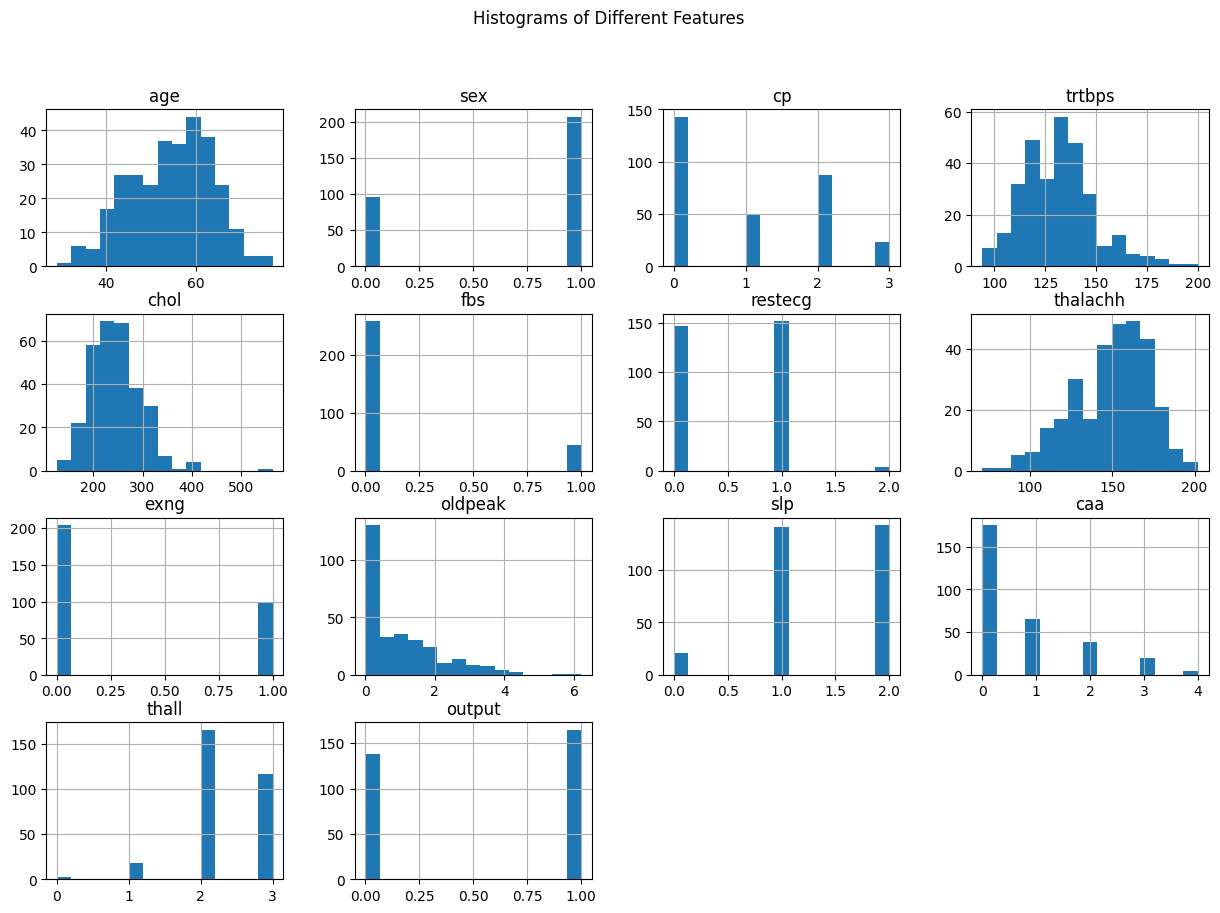

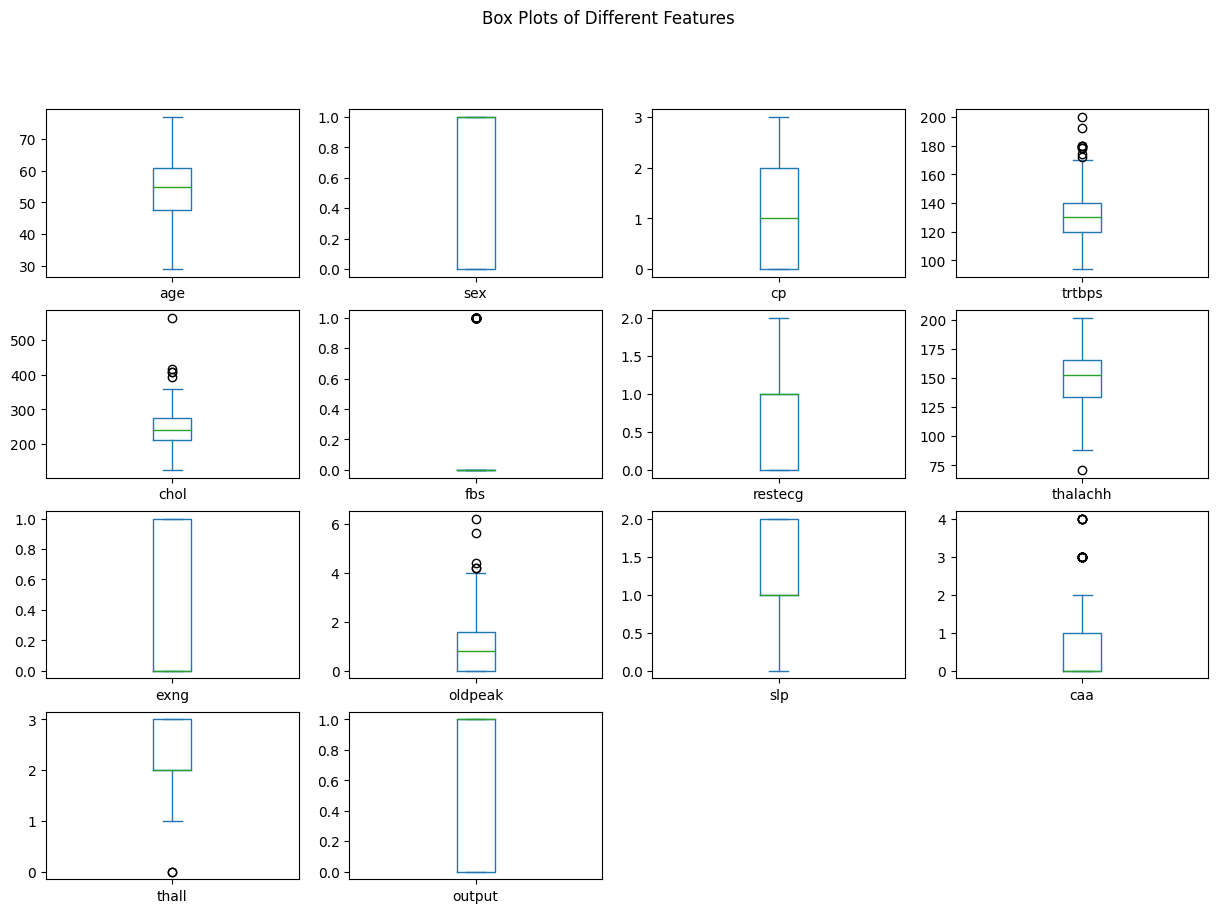

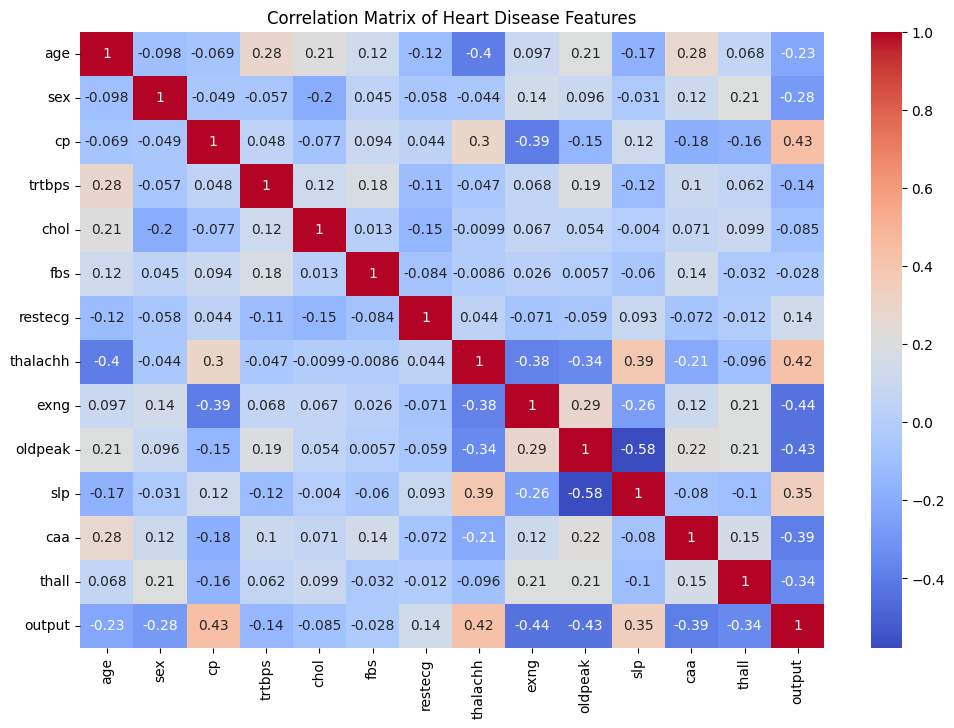

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature Ranking:
      Feature  Importance
8       exng           1
1        sex           2
10       slp           3
12     thall           4
11       caa           5
2         cp           6
9    oldpeak           7
6    restecg           8
7   thalachh           9
3     trtbps          10
5        fbs          11
4       chol          12
0        age          13


In [5]:
# Exploratory Data Analysis (EDA) with Visualizations
# Histograms for each feature
heart_data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Histograms of Different Features")
plt.show()

# Box plots for each feature
heart_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle("Box Plots of Different Features")
plt.show()

# Correlation Analysis
correlation_matrix = heart_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Heart Disease Features")
plt.show()

# Feature Importance using Recursive Feature Elimination (RFE) with Logistic Regression
model = LogisticRegression(max_iter=1000)  # Increasing max_iter for convergence
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(heart_data.drop("output", axis=1), heart_data["output"])
feature_ranking = pd.DataFrame({'Feature': heart_data.drop("output", axis=1).columns,
                                'Importance': fit.ranking_}).sort_values(by="Importance")

print("Feature Ranking:\n", feature_ranking)


**4. Remove Outliers using the IQR method.**

In [6]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying the function to each column (modify this list based on your dataset's features)
columns_to_check = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']  # Example columns
for column in columns_to_check:
    heart_data = remove_outliers(heart_data, column)

# Checking the shape of the dataset after outlier removal
print("Dataset shape after outlier removal:", heart_data.shape)


Dataset shape after outlier removal: (284, 14)


**5. Normalize the data to bring all the features to the same scale.**

In [7]:
from sklearn.preprocessing import StandardScaler

# Separating the features and the target variable
X = heart_data.drop('output', axis=1)  # Assuming 'output' is the target variable
y = heart_data['output']

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the features and transforming them
X_scaled = scaler.fit_transform(X)

# Creating a new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Displaying the first few rows of the scaled dataset
print(X_scaled_df.head())


        age       sex        cp    trtbps      chol       fbs   restecg  \
0  0.984857  0.653556  1.953064  0.983507 -0.203189  2.469818 -1.022108   
1 -1.858061  0.653556  0.981663  0.005738  0.177337 -0.404888  0.926071   
2 -1.420689 -1.530090  0.010261  0.005738 -0.852322 -0.404888 -1.022108   
3  0.219456  0.653556  0.010261 -0.646108 -0.136037 -0.404888  0.926071   
4  0.328799 -1.530090 -0.961140 -0.646108  2.505263 -0.404888  0.926071   

   thalachh      exng   oldpeak       slp       caa     thall  
0 -0.001865 -0.681115  1.319305 -2.390221 -0.706823 -2.129481  
1  1.631492 -0.681115  2.490799 -2.390221 -0.706823 -0.486077  
2  0.969320 -0.681115  0.440685  0.953734 -0.706823 -0.486077  
3  1.234189 -0.681115 -0.145062  0.953734 -0.706823 -0.486077  
4  0.572017  1.468181 -0.340311  0.953734 -0.706823 -0.486077  


**6. Split the dataset into training and testing sets (80% train and 20% test).**

In [8]:
from sklearn.model_selection import train_test_split

# Assuming X_scaled_df contains the scaled features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.20, random_state=42)

# Printing the shape of the training and testing sets to verify the split
print("Training set shape (features):", X_train.shape)
print("Training set shape (target):", y_train.shape)
print("Testing set shape (features):", X_test.shape)
print("Testing set shape (target):", y_test.shape)


Training set shape (features): (227, 13)
Training set shape (target): (227,)
Testing set shape (features): (57, 13)
Testing set shape (target): (57,)


**7. Train a Logistic regression model using the training data**

In [9]:
from sklearn.linear_model import LogisticRegression

# Initializing the Logistic Regression model
logistic_model = LogisticRegression()

# Training the model with the training data
logistic_model.fit(X_train, y_train)

# Optional: Print the model's coefficients and intercept
print("Model Coefficients:", logistic_model.coef_)
print("Model Intercept:", logistic_model.intercept_)


Model Coefficients: [[ 0.0732253  -0.7072672   0.73230107 -0.28096726 -0.32237636 -0.0622338
   0.31409242  0.5971899  -0.4598203  -0.48485178  0.28186272 -0.67866901
  -0.60367316]]
Model Intercept: [0.21742953]


**8. Fit the model on the test data and get the prediction results**

In [10]:
# Making predictions on the test data
y_pred = logistic_model.predict(X_test)

# Optionally, to view the predicted values
print("Predicted values on test data:", y_pred)


Predicted values on test data: [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1
 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0]


**9. Report model accuracy, and calculate evaluation criteria such as Confusion Matrix.**

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Model Accuracy: 0.8596491228070176
Confusion Matrix:
 [[22  4]
 [ 4 27]]


**10. Check if the model is over-fitted by comparing the performance on the training set and the test set.**

In [12]:
# Predicting on the training set for overfitting check
y_train_pred = logistic_model.predict(X_train)

# Calculating accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Comparing training and test set accuracy
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", accuracy)


Training Set Accuracy: 0.8414096916299559
Test Set Accuracy: 0.8596491228070176


**Implement Gradient Descent**

Optimal Weights: [ 0.21637972 -0.13104244 -0.51248142  0.58376561 -0.15798897 -0.18706345
  0.00750966  0.20840714  0.40556216 -0.41407915 -0.50011924  0.28998713
 -0.5361054  -0.46512667]


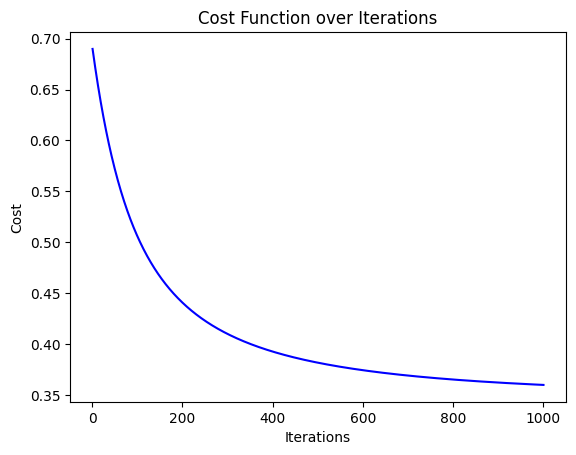

In [13]:
import numpy as np

def sigmoid(z):
    """ Sigmoid activation function """
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    """ Compute the binary cross-entropy cost """
    m = len(y)
    h = sigmoid(X @ weights)
    epsilon = 1e-5  # to avoid log(0) error
    cost = (1/m) * ((-y).T @ np.log(h + epsilon) - (1 - y).T @ np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, weights, learning_rate, iterations):
    """ Gradient Descent to minimize the logistic regression cost function """
    m = len(y)
    cost_history = []

    for i in range(iterations):
        weights = weights - (learning_rate/m) * (X.T @ (sigmoid(X @ weights) - y))
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# Preparing the data
m, n = X_scaled_df.shape
X_with_intercept = np.hstack((np.ones((m, 1)), X_scaled_df))  # Add intercept term
initial_weights = np.zeros(n + 1)  # Initial weights (including intercept)

# Gradient Descent parameters
learning_rate = 0.01
iterations = 1000

# Performing Gradient Descent
optimal_weights, cost_history = gradient_descent(X_with_intercept, y, initial_weights, learning_rate, iterations)

# Print the optimal weights
print("Optimal Weights:", optimal_weights)

# Optionally, plot the cost history over iterations
import matplotlib.pyplot as plt

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()
